In [144]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV,  Lasso, LassoCV)  
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import sklearn 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_diabetes


In [124]:
diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
alpha = 0.5
print y_train.shape, train_pred.shape

(105,) (45,)


In [71]:
ridge=Ridge(alpha)
ridge_model=ridge.fit(X_train, y_train)
test_pred=ridge_model.predict(X_test) 
rmse_ridge = np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Ridge: ", rmse_ridge

RMSE for Ridge:  59.9963557849


In [95]:
ridgecv=RidgeCV(alphas=np.logspace(-4,1))
ridgecv_model=ridgecv.fit(X_train, y_train)
test_pred=ridgecv_model.predict(X_test) 
rmse_ridgecv=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Ridge CV: " , rmse_ridgecv
print ridgecv_model.alpha_


RMSE for Ridge CV:  54.2702622991
0.0355648030622


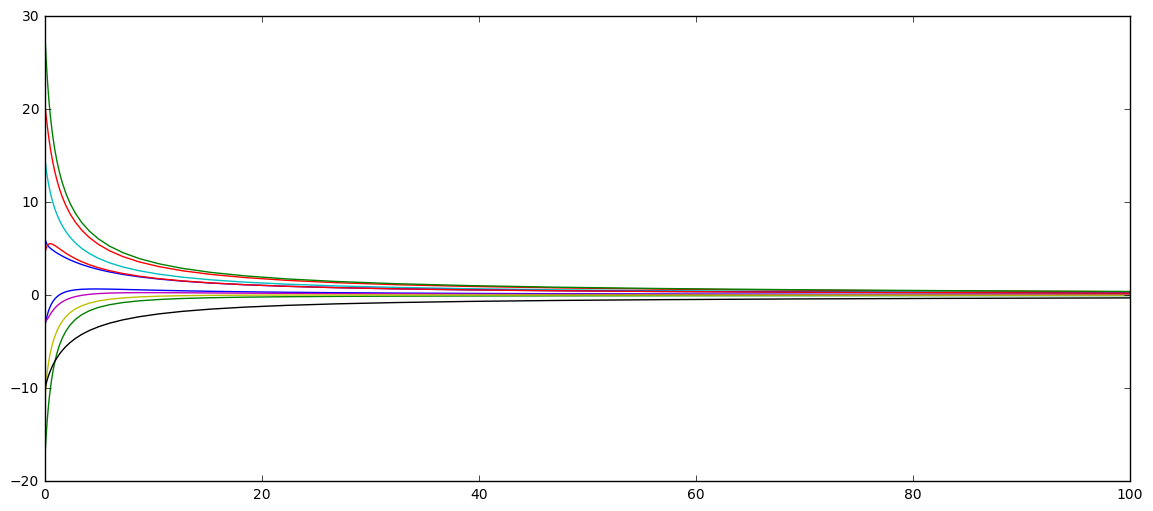

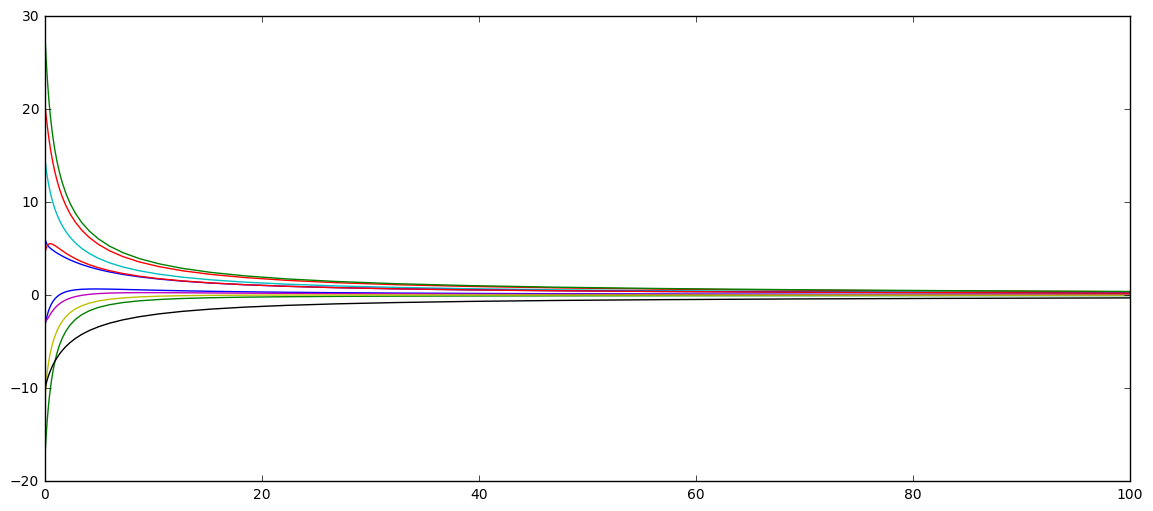

In [35]:
from sklearn import preprocessing

k = X.shape[1]
alphas = np.logspace(-2, 2)
params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    X_data = preprocessing.scale(X)
    fit = Ridge(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_

fig = plt.figure(figsize=(14,6))
for param in params.T:
    plt.plot(alphas, param)
plt.show()

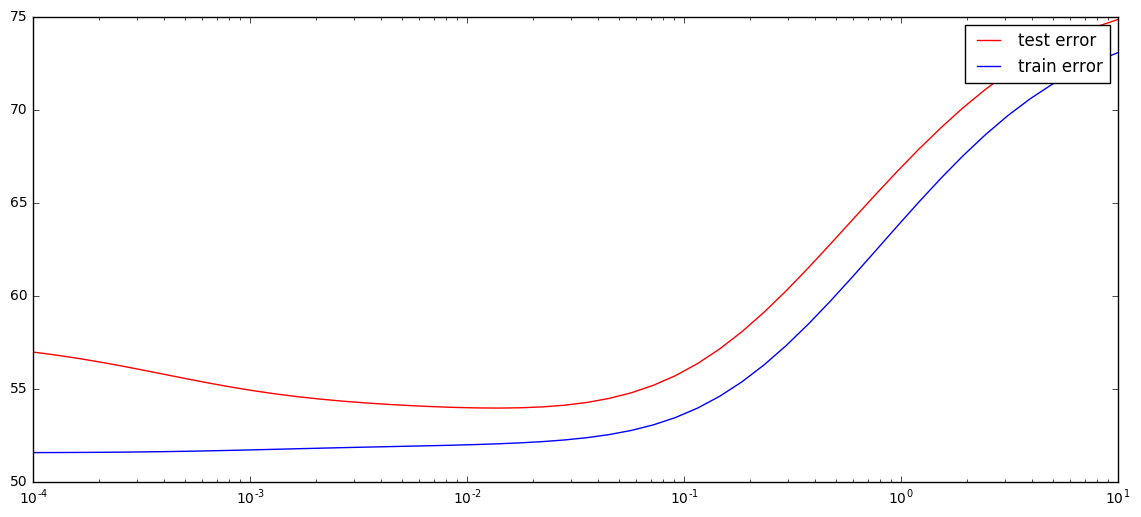

In [110]:
from sklearn import preprocessing

k = X.shape[1]
alphas = np.logspace(-4, 1)
params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    X_data = preprocessing.scale(X)
    fit = Ridge(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_

fig = plt.figure(figsize=(14,6))

test_error=[]
train_error=[]

for alpha in alphas:
    ridge=Ridge(alpha)
    ridge_model=ridge.fit(X_train, y_train)
    test_pred=ridge_model.predict(X_test) 
    train_pred=ridge_model.predict(X_train) 
    rmse_ridge_test = np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
    rmse_ridge_train = np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_pred))
    test_error.append(rmse_ridge_test)
    train_error.append(rmse_ridge_train)

plt.plot(alphas,test_error, label='test error', c='r' )
plt.plot(alphas,train_error, label='train error', c='b' )
#plt.xlim(0, )
#plt.ylim(log(1.5), log(2))
plt.xscale('log')
plt.legend()
plt.show()

#### Part2

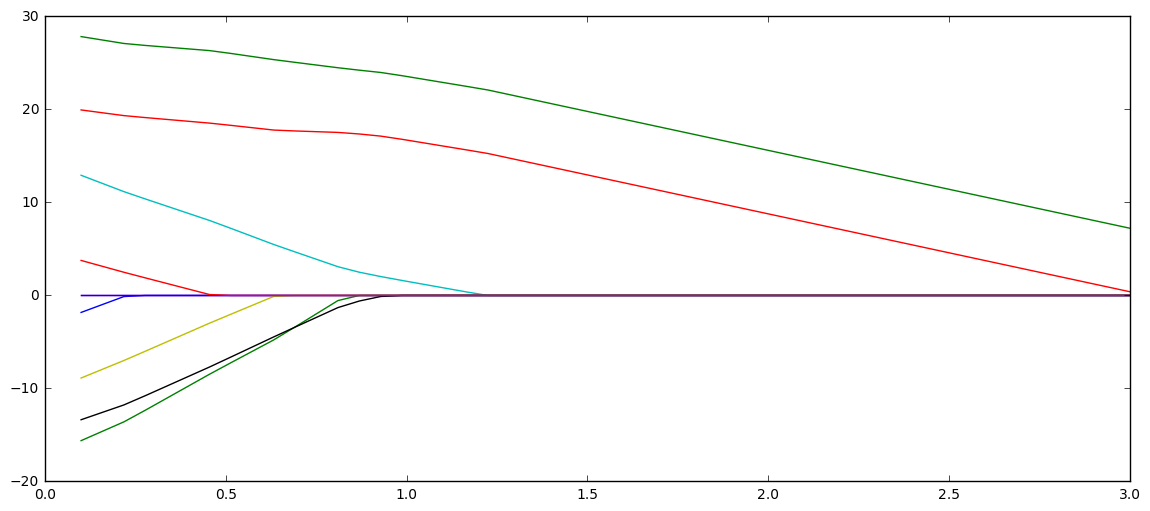

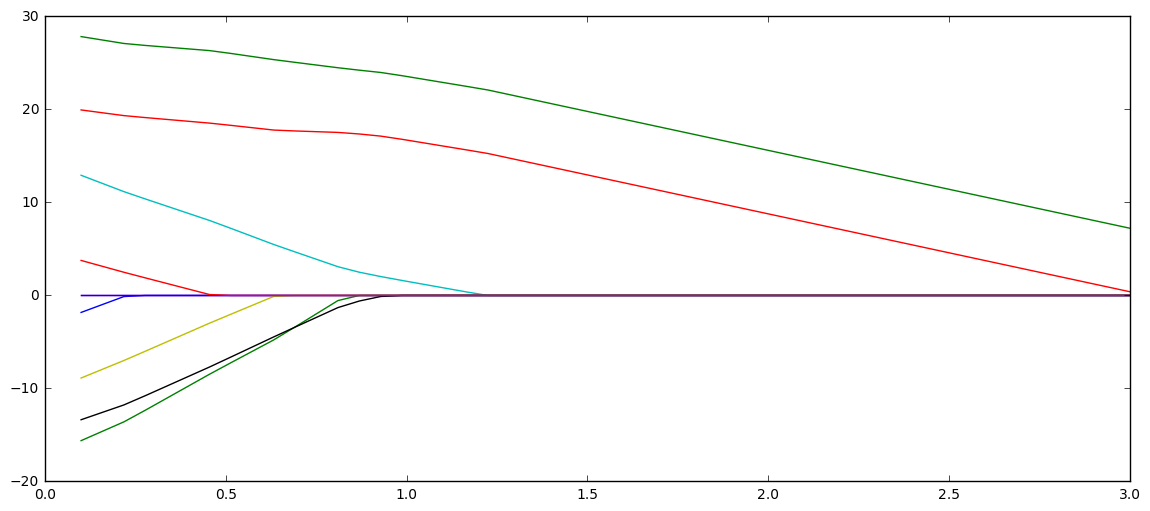

In [63]:
k = X.shape[1]
alphas = np.linspace(0.1, 3)
params = np.zeros((len(alphas), k))
for i, a in enumerate(alphas):
    X_data = preprocessing.scale(X)
    fit =Lasso(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_

fig = plt.figure(figsize=(14,6))
for param in params.T:
    plt.plot(alphas, param)
plt.show() 

/Users/koyuki.nakamori/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


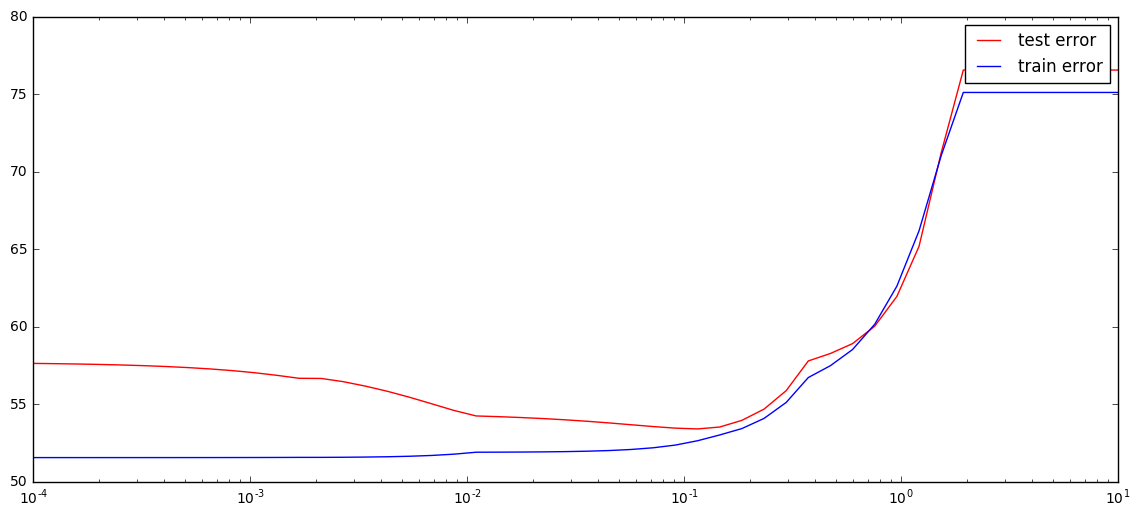

In [111]:
from sklearn import preprocessing

k = X.shape[1]
alphas = np.logspace(-4, 1)
params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    X_data = preprocessing.scale(X)
    fit = Ridge(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_

fig = plt.figure(figsize=(14,6))

test_error=[]
train_error=[]

for alpha in alphas:
    lasso=Lasso(alpha)
    lasso_model=lasso.fit(X_train, y_train)
    test_pred=lasso_model.predict(X_test) 
    train_pred=lasso_model.predict(X_train) 
    rmse_ridge_test = np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
    rmse_ridge_train = np.sqrt(sklearn.metrics.mean_squared_error(y_train, train_pred))
    test_error.append(rmse_ridge_test)
    train_error.append(rmse_ridge_train)

plt.plot(alphas,test_error, label='test error', c='r' )
plt.plot(alphas,train_error, label='train error', c='b' )
#plt.xlim(0, )
#plt.ylim(log(1.5), log(2))
plt.xscale('log')
plt.legend()
plt.show()


#### Part 3

In [138]:
linear=LinearRegression()
linear_model=linear.fit(X_train, y_train)
test_pred=linear.predict(X_test) 
rmse_lr=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for lr: ", rmse_lr
print "RMSE for Ridge CV: " , rmse_ridgecv
print "RMSE for Ridge with alpha 0.5: ", rmse_ridge



lasso=LassoCV()
lasso_model=lasso.fit(X_train, y_train)
test_pred=lasso_model.predict(X_test) 
train_pred=lasso_model.predict(X_train) 
rmse_lasso=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Lasso CV: ", rmse_lasso



ridge=Ridge(.1)
ridge_model=ridge.fit(X_train, y_train)
test_pred=ridge_model.predict(X_test) 
train_pred=ridge_model.predict(X_train) 
rmse_ridge=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Ridge with Optimal alpha: ", rmse_ridge


lasso=Lasso(0.1)
lasso_model=lasso.fit(X_train, y_train)
test_pred=lasso_model.predict(X_test) 
train_pred=lasso_model.predict(X_train) 
rmse_lasso=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Lasso with Optimal alpha: ", rmse_lasso






RMSE for lr:  56.6195302358
RMSE for Ridge CV:  54.2702622991
RMSE for Ridge with alpha 0.5:  55.5930252663
RMSE for Lasso CV:  54.3003820702
RMSE for Ridge with Optimal alpha:  55.5930252663
RMSE for Lasso with Optimal alpha:  54.1856200003


In [ ]:
"""

import statsmodels.api as sm 
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
ols_model=sm.OLS(y_train, X_train).fit()
test_pred=ols_model.predict(X_test)
rmse_ols=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for OLS: ", rmse_ols
print "RMSE for Ridge CV: " , rmse_ridgecv
print "RMSE for Ridge: ", rmse_ridge
"""

In [134]:
np.log(10**(-1))

-2.3025850929940455

In [146]:
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [148]:
linear=LinearRegression()
linear_model=linear.fit(X_train, y_train)
test_pred=linear.predict(X_test) 
rmse_lr=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for lr: ", rmse_lr


lasso=LassoCV(alphas=np.logspace(-4, 4))
lasso_model=lasso.fit(X_train, y_train)
test_pred=lasso_model.predict(X_test) 
train_pred=lasso_model.predict(X_train) 
rmse_lasso=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Lasso CV: ", rmse_lasso



ridge=Ridge(.1)
ridge_model=ridge.fit(X_train, y_train)
test_pred=ridge_model.predict(X_test) 
train_pred=ridge_model.predict(X_train) 
rmse_ridge=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Ridge with Optimal alpha: ", rmse_ridge


lasso=Lasso(0.1)
lasso_model=lasso.fit(X_train, y_train)
test_pred=lasso_model.predict(X_test) 
train_pred=lasso_model.predict(X_train) 
rmse_lasso=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Lasso with Optimal alpha: ", rmse_lasso



ridgecv=RidgeCV(alphas=np.logspace(-4,4))
ridgecv_model=ridgecv.fit(X_train, y_train)
test_pred=ridgecv_model.predict(X_test) 
rmse_ridgecv=np.sqrt(sklearn.metrics.mean_squared_error(y_test, test_pred))
print "RMSE for Ridge CV: " , rmse_ridgecv



RMSE for lr:  56.0359039347
RMSE for Lasso CV:  56.8278333509
RMSE for Ridge with Optimal alpha:  57.1584787705
RMSE for Lasso with Optimal alpha:  57.3156686865
RMSE for Ridge CV:  56.8046785469
